#**AD CLICK PREDICTION ANALYSIS**
# **(Phân tích dự đoán dựa vào lượt nhấp chuột vào quảng cáo)**

# IMPORT LIBRARIES AND LOAD DATA
**Import thư viện cần thiết và tải bộ dữ liệu**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gdown
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

url = "https://drive.google.com/uc?id=1P6IUd8WQrTAlWZMshN5iV0uDwMIXOcW3"
output = "data.xlsx"
gdown.download(url, output, quiet=False)
data = pd.read_excel(output)
data

Mounted at /content/drive


Downloading...
From: https://drive.google.com/uc?id=1P6IUd8WQrTAlWZMshN5iV0uDwMIXOcW3
To: /content/data.xlsx
100%|██████████| 352k/352k [00:00<00:00, 81.0MB/s]


,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0
9998,7924,User7924,NaN,NaN,Desktop,NaN,Shopping,Morning,1


# INFORMATION ABOUT THE DATA
**Thông tin về bộ dữ liệu**

-
Tập dữ liệu được phân tích chứa các cột sau: id, full_name, tuổi, giới tính, device_type, ad_position, browser_history, time_of_day và click. Mục tiêu chính là tìm hiểu hành vi của người dùng xung quanh các lần nhấp vào quảng cáo bằng cách kiểm tra các xu hướng về độ tuổi, giới tính, mức sử dụng thiết bị, lịch sử duyệt web và các yếu tố khác, cùng với việc xây dựng các mô hình dự đoán bằng cách sử dụng máy học.



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


In [ ]:
data = data.drop(['id', 'full_name'],axis=1)
num_cols = data.select_dtypes(include=['float64', 'int64'])
cat_cols = data.select_dtypes(include=['object'])

In [ ]:
data.isna().sum()

,0
age,4766
gender,4693
device_type,2000
ad_position,2000
browsing_history,4782
time_of_day,2000
click,0


Ở các biến Age, Gender, Device_type, Ad_position, Browsing_history, Time_of_day có các biến bị thiếu (missing value)\
Sau đây sẽ tiến hành loại bỏ các dòng chứa giá trị bị thiếu

In [ ]:
data = data.dropna()
data

,age,gender,device_type,ad_position,browsing_history,time_of_day,click
17,56.0,Female,Tablet,Bottom,News,Morning,1
25,43.0,Male,Tablet,Bottom,Education,Afternoon,1
33,37.0,Male,Mobile,Top,News,Evening,0
52,49.0,Male,Mobile,Top,News,Morning,1
102,59.0,Female,Desktop,Bottom,Social Media,Morning,0
...,...,...,...,...,...,...,...
9951,28.0,Female,Desktop,Bottom,News,Evening,1
9952,41.0,Non-Binary,Mobile,Side,Education,Night,1
9960,64.0,Non-Binary,Desktop,Top,Entertainment,Morning,0
9986,52.0,Female,Desktop,Bottom,Shopping,Afternoon,1


In [ ]:
data.isnull().sum()

,0
age,0
gender,0
device_type,0
ad_position,0
browsing_history,0
time_of_day,0
click,0


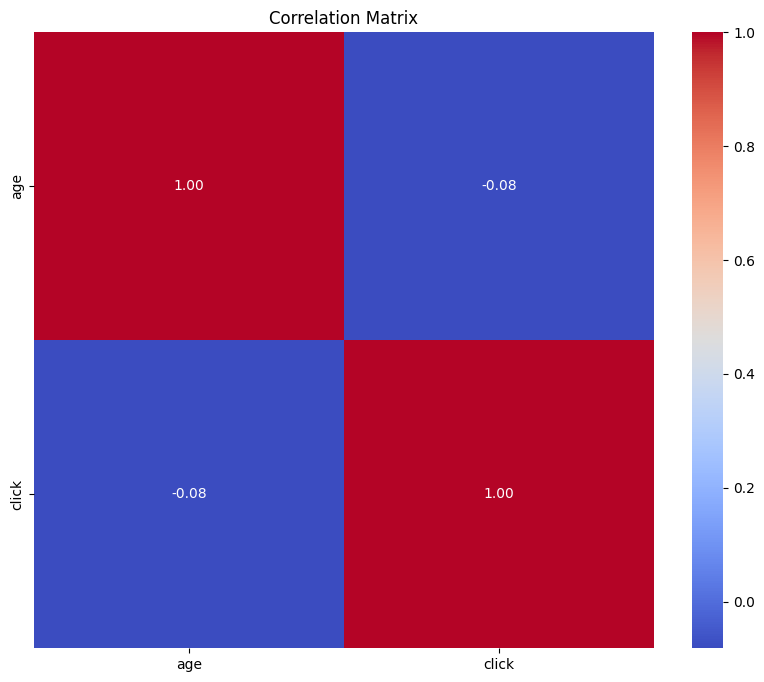

In [ ]:
plt.figure(figsize=(10, 8))
corr = num_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

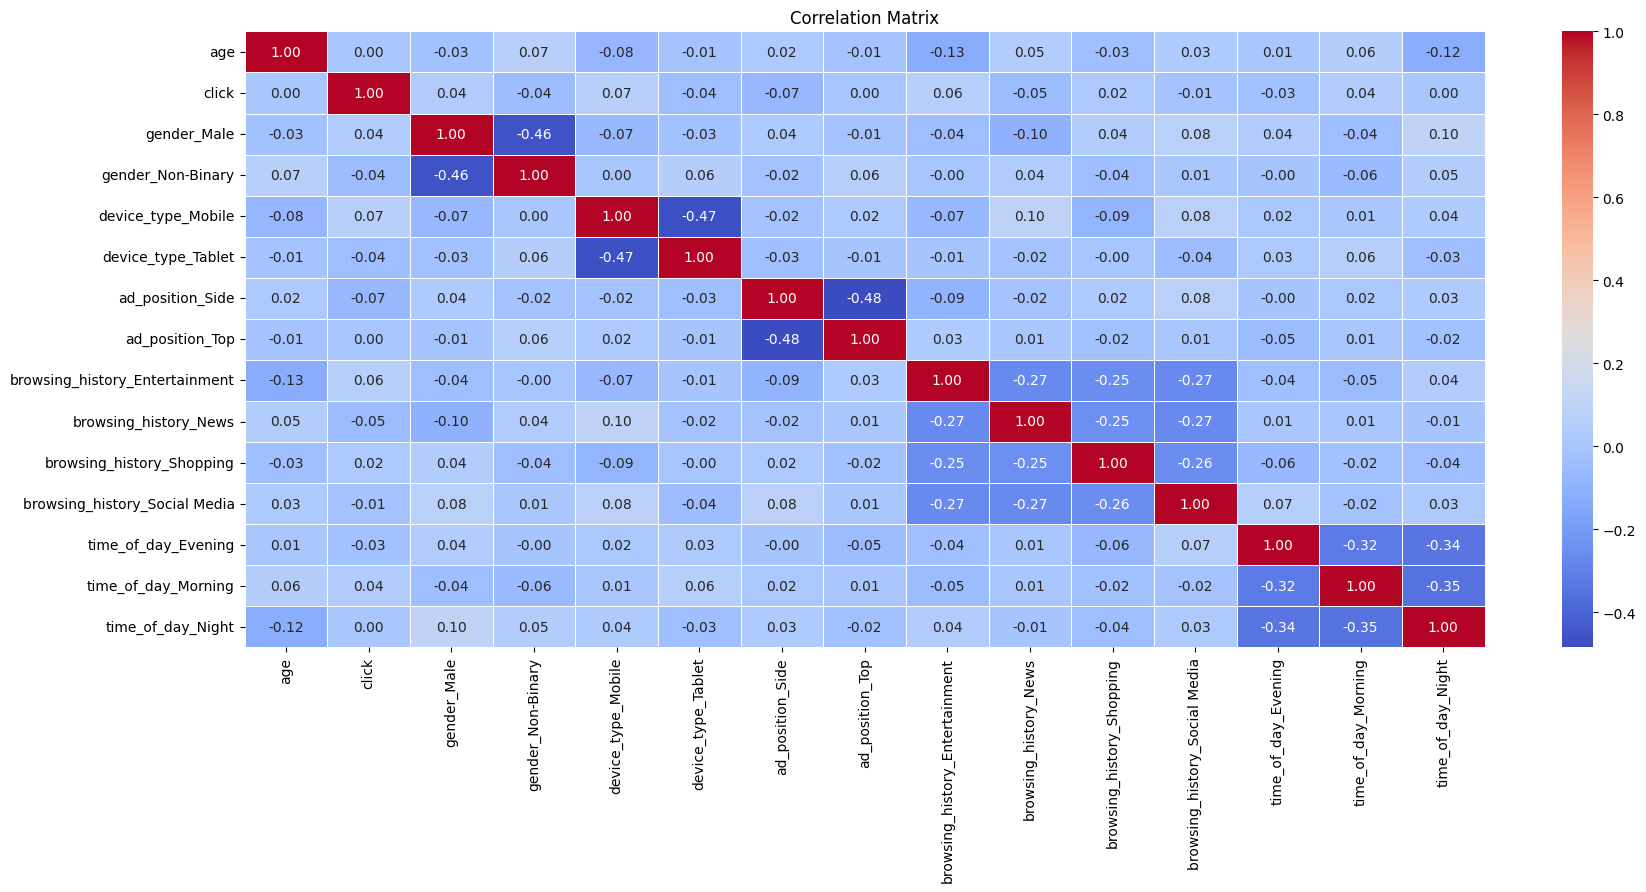

In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)
corr_matrix = data_encoded.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

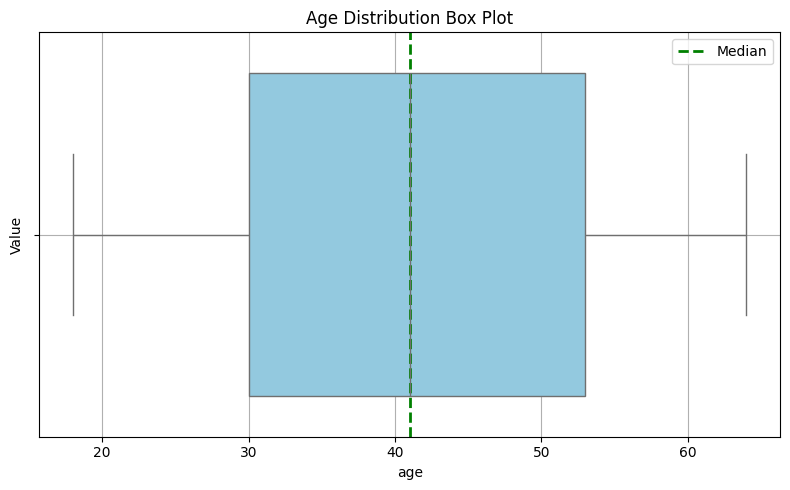

In [ ]:
#Kiểm tra outlier
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="age", color='skyblue', flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.title('Age Distribution Box Plot')
plt.xlabel('age')
plt.ylabel('Value')
median_age = data['age'].median()
plt.axvline(median_age, color='green', linestyle='--', linewidth=2, label='Median')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

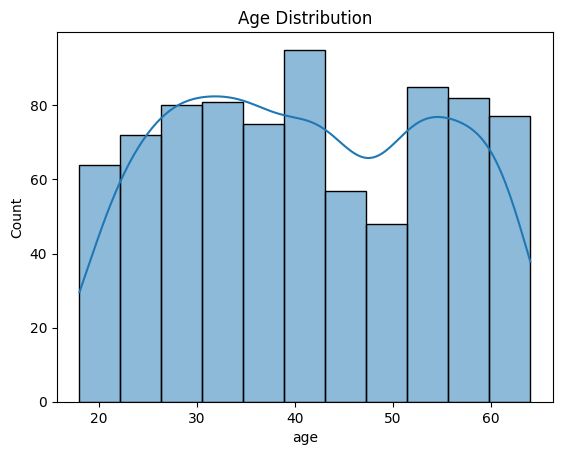

In [ ]:
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()
#Độ tuổi click vào quảng cáo nhiều nhất là từ 30 đến 50 tuổi

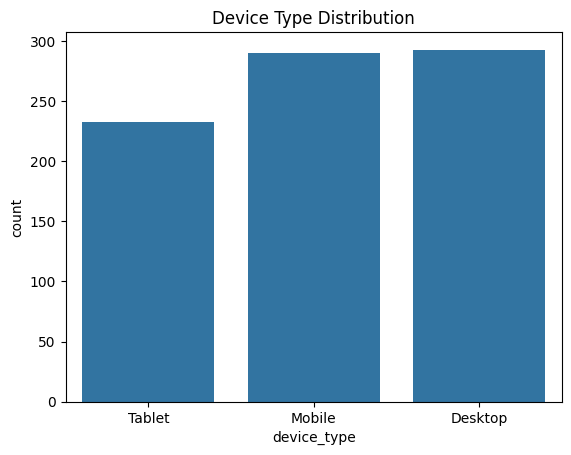

In [ ]:
sns.countplot(data=data, x='device_type')
plt.title('Device Type Distribution')
plt.show()
# Hầu hết sử dụng điện thoại và máy tính bàn để xem quảng cáo

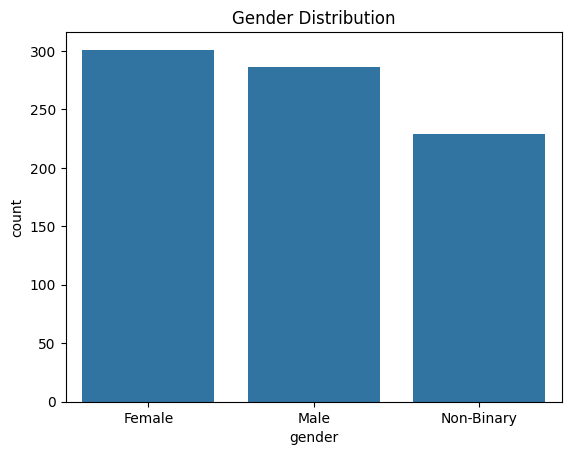

In [ ]:
sns.countplot(data=data, x='gender')
plt.title('Gender Distribution')
plt.show()
#nam xem quảng cáo nhiều nhất

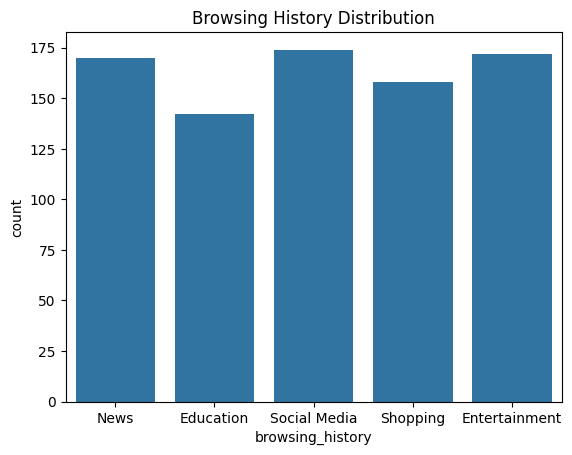

In [ ]:
sns.countplot(data=data, x='browsing_history')
plt.title('Browsing History Distribution')
plt.show()
#các quảng cáo về News, Education và Entertainmet có lượt xem nhiều nhất

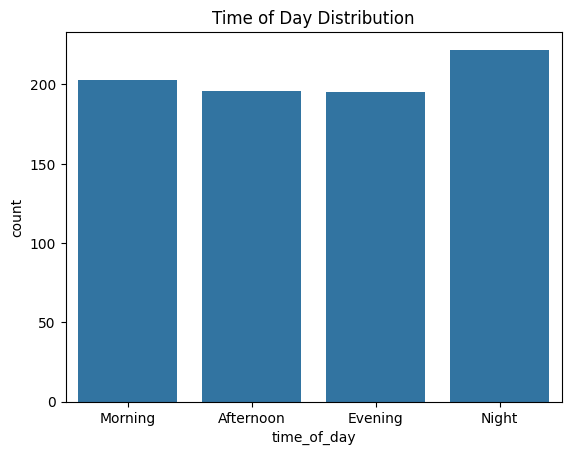

In [ ]:
sns.countplot(data=data, x='time_of_day')
plt.title('Time of Day Distribution')
plt.show()
#buổi tối là thời gian có lượt truy cập xem quảng cáo nhiều nhất

# DATA ANALYSIS
**Phân tích dữ liệu**

In [ ]:
#Chia bộ dữ liệu thành 2 phần train và test
X = data.drop(['click'], axis=1)
y = data['click']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**KNN CLASSIFICATION**

In [ ]:
features = X
target = y
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=3)
model.fit(feature_train,target_train)
predictions = model.predict(feature_test)

print("Accuracy:",accuracy_score(target_test, predictions))
print("Precision:",precision_score(target_test, predictions))
print("Recall:",recall_score(target_test, predictions))
print("F1-Score:",f1_score(target_test, predictions))

ValueError: could not convert string to float: 'Female'

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình
model = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện mô hình
model.fit(feature_train, target_train)

# Dự đoán
predictions = model.predict(feature_test)

# Đánh giá
print("Accuracy:", accuracy_score(target_test, predictions))


SVM

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, predictions))
print("Precision:",precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))
print("F1-Score:",f1_score(y_test, predictions))

Accuracy: 0.636734693877551
Precision: 0.636734693877551
Recall: 1.0
F1-Score: 0.7780548628428927


CONFUSION MATRIX

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import LeaveOneOut

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
random_forest_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)


# Cross-Validation: Reduce the number of splits to match your sample size or use Leave-One-Out CV (LOOCV)
loo = LeaveOneOut()

# Logistic Regression LOOCV
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=loo, scoring='accuracy')
print(f"Logistic Regression LOOCV Accuracy: {logistic_cv_scores.mean():.2f} ± {logistic_cv_scores.std():.2f}")

# Random Forest LOOCV
rf_cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=loo, scoring='accuracy')
print(f"Random Forest LOOCV Accuracy: {rf_cv_scores.mean():.2f} ± {rf_cv_scores.std():.2f}")

# XGBoost LOOCV
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=loo, scoring='accuracy')
print(f"XGBoost LOOCV Accuracy: {xgb_cv_scores.mean():.2f} ± {xgb_cv_scores.std():.2f}")
# Step 3: Hyperparameter Tuning with GridSearchCV

# Logistic Regression Hyperparameter Tuning
logistic_params = {'C': [0.1, 1.0, 10], 'solver': ['liblinear', 'lbfgs']}
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=3, scoring='accuracy')
logistic_grid.fit(X_train, y_train)
print(f"Best Logistic Regression Parameters: {logistic_grid.best_params_}")
# Random Forest Hyperparameter Tuning
rf_params = {'n_estimators': [100, 200], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(random_forest_model, rf_params, cv=3, scoring='accuracy')
rf_grid.fit(X_train, y_train)
print(f"Best Random Forest Parameters: {rf_grid.best_params_}")

# XGBoost Hyperparameter Tuning
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 10]}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
print(f"Best XGBoost Parameters: {xgb_grid.best_params_}")
# Step 4: Classification Report

# Logistic Regression Predictions and Report
logistic_best = logistic_grid.best_estimator_
y_pred_logistic = logistic_best.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Random Forest Predictions and Report
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# XGBoost Predictions and Report
xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Final Model Accuracy Comparison
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_logistic):.2f}")
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"XGBoost Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")

Logistic Regression LOOCV Accuracy: 0.62 ± 0.48
Random Forest LOOCV Accuracy: 0.84 ± 0.37
XGBoost LOOCV Accuracy: 0.83 ± 0.38
Best Logistic Regression Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.03      0.06        89
           1       0.64      0.99      0.78       156

    accuracy                           0.64       245
   macro avg       0.70      0.51      0.42       245
weighted avg       0.68      0.64      0.52       245


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.56      0.69        89
           1       0.79      0.96      0.87       156

    accuracy                           0.82       

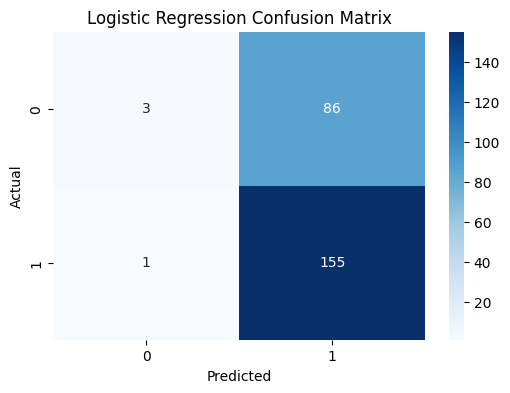

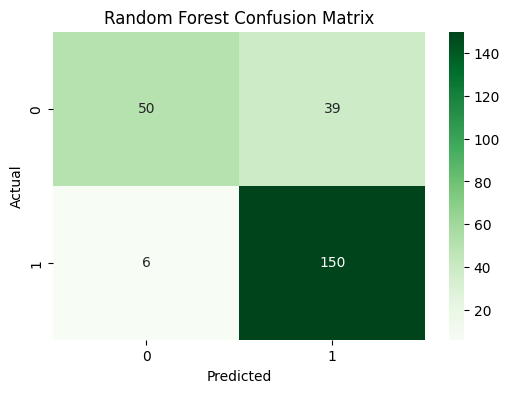

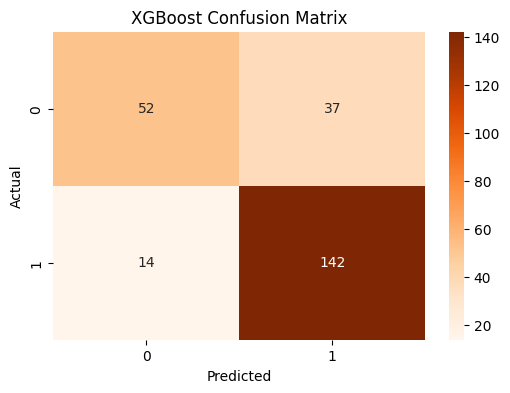

In [ ]:
# Logistic Regression Confusion Matrix
logistic_cm = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6, 4))
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

NameError: name 'y_pred_rf' is not defined

In [ ]:
# XGBoost Confusion Matrix
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Oranges')
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

NameError: name 'y_pred_xgb' is not defined

ROC Curve and AUC

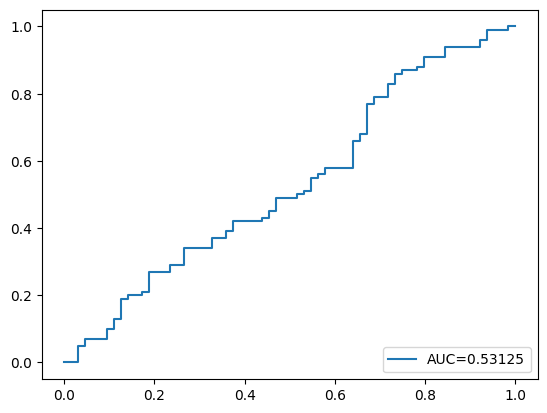

In [ ]:
from sklearn import metrics

log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
y_pred = log_regression.predict(X_test)

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# Best model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = data.drop(['click'], axis=1)
scl = MinMaxScaler()
scl.fit(X)
X_scaled = scl.transform(X)

y = data['click']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.23303760124151582
R-squared: -0.007496543829011104


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
import joblib

X = data.drop(['click'], axis=1)
y = data['click']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

models = {
       'Logistic Regression':LogisticRegression(),
       'SVM': SVC(),
       'Nearest Neighbors': KNeighborsClassifier(),
       'Linear SVM': SVC(kernel='linear'),
       'RBF SVM': SVC(kernel='rbf'),
       'Decision Tree': DecisionTreeClassifier(),
       'Naive Bayes': GaussianNB(),
       'Random Forest': RandomForestClassifier(),
       'AdaBoost': AdaBoostClassifier(),
       'Gradient Boosting': GradientBoostingClassifier()
}

best_model = None
best_score = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = accuracy_score(y_test, predictions)

    if score > best_score:
        best_score = score
        best_model = model
        best_model_name = model_name

print(f"Best Model: {best_model_name} with Accuracy: {best_score}")

Best Model: Random Forest with Accuracy: 0.8448979591836735


In [ ]:
import joblib

joblib.dump(best_model, f"{best_model_name}_model.pkl")
print(f"The best model '{best_model_name}' has been saved as {best_model_name}_model.pkl")

The best model 'Random Forest' has been saved as Random Forest_model.pkl


# Kết luận

1. Phân bổ độ tuổi và số lần nhấp vào quảng cáo
Ridgeline Plot tiết lộ rằng người dùng trong độ tuổi 25-35 có xu hướng nhấp chuột và không nhấp chuột, trong khi những người dùng lớn tuổi ít có khả năng tương tác với quảng cáo hơn.
2. Giới tính và tương tác quảng cáo
Nam giới nhấp vào quảng cáo thường xuyên hơn so với nữ giới.
Biểu đồ bánh rán xác nhận rằng nam giới chịu trách nhiệm về tỷ lệ nhấp chuột vào quảng cáo cao hơn, có thể do thói quen duyệt web hoặc chiến lược nhắm mục tiêu quảng cáo khác nhau.
3. Loại thiết bị và vị trí quảng cáo
Người dùng thiết bị di động tương tác với quảng cáo thường xuyên hơn so với người dùng máy tính để bàn.
Quảng cáo hiển thị ở các vị trí cao (trên cùng hoặc thanh bên) có tỷ lệ tương tác cao hơn đáng kể.
Sơ đồ Sankey nêu bật hành trình rõ ràng của người dùng từ loại thiết bị đến vị trí quảng cáo rồi nhấp chuột, cho thấy rằng các kết hợp thiết bị và quảng cáo nhất định có hiệu quả hơn trong việc tạo ra nhấp chuột.
4. Ảnh hưởng của thời gian trong ngày
Vào buổi sáng, số lượt nhấp vào quảng cáo đạt mức cao nhất, có thể là do người dùng bắt đầu ngày mới và tương tác nhiều hơn với nội dung.
Buổi tối muộn cũng cho thấy mức độ tương tác tăng lên khi người dùng thư giãn.
Thông tin này rất quan trọng để lập kế hoạch cho các chiến dịch quảng cáo nhằm đạt được mức độ tương tác tối ưu.
5. Lịch sử duyệt web và số lần nhấp chuột
Người dùng có lịch sử duyệt web rộng hơn cho thấy mức độ tương tác với quảng cáo thấp hơn, có thể do nhàm chán với quảng cáo hoặc quen với các quảng cáo trực tuyến phổ biến.
Người dùng có phiên duyệt ngắn hơn có nhiều khả năng nhấp vào quảng cáo hơn, cho thấy rằng người dùng mới hoặc người dùng không thường xuyên có xu hướng tương tác nhiều hơn với nội dung quảng cáo.

Phân tích này nêu bật tầm quan trọng của việc hiểu rõ kiểu hành vi của người dùng và thời gian tương tác để tối ưu hóa vị trí đặt quảng cáo. Giới tính, độ tuổi và loại thiết bị đều đóng vai trò quan trọng trong việc xác định liệu người dùng có khả năng nhấp vào quảng cáo hay không. Nhìn chung, những thông tin chi tiết này có thể giúp nhà quảng cáo và nhà tiếp thị điều chỉnh chiến dịch quảng cáo của họ tốt hơn và cải thiện chiến lược nhắm mục tiêu để tối đa hóa mức độ tương tác.
